In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

In [20]:
# Set a seaborn theme for better visuals
sns.set_theme(style="whitegrid")

# 1. **Data Loading and Cleaning**

In [21]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

# Display the first few rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Handling missing Values

In [22]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

if df['chol'].isnull().sum() > 0:
    # Impute missing values with median
    df['chol'].fillna(df['chol'].median(), inplace=True)

Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Handling Outliers

In [23]:
# Detect outliers using the Interquartile Range (IQR) method
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numeric_cols:
    remove_outliers(col)

### Handling Inconsistencies

In [24]:

# Check for inconsistent categorical data
print("Unique values in 'sex':", df['sex'].unique())
print("Unique values in 'cp':", df['cp'].unique())

# Assuming 'sex' should be 0 or 1, fix if there are inconsistencies
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})

Unique values in 'sex': [1 0]
Unique values in 'cp': [0 1 2 3]


# 2. Exploratory Data Analysis (EDA)

In [25]:
# Statistical summary of numeric variables
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.260488,244.981463,0.149268,0.529756,149.153171,0.336585,1.062244,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,16.532208,47.746162,0.356527,0.527878,22.881210,0.472772,1.141865,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,371.000000,1.000000,2.000000,202.000000,1.000000,4.500000,2.000000,4.000000,3.000000,1.000000


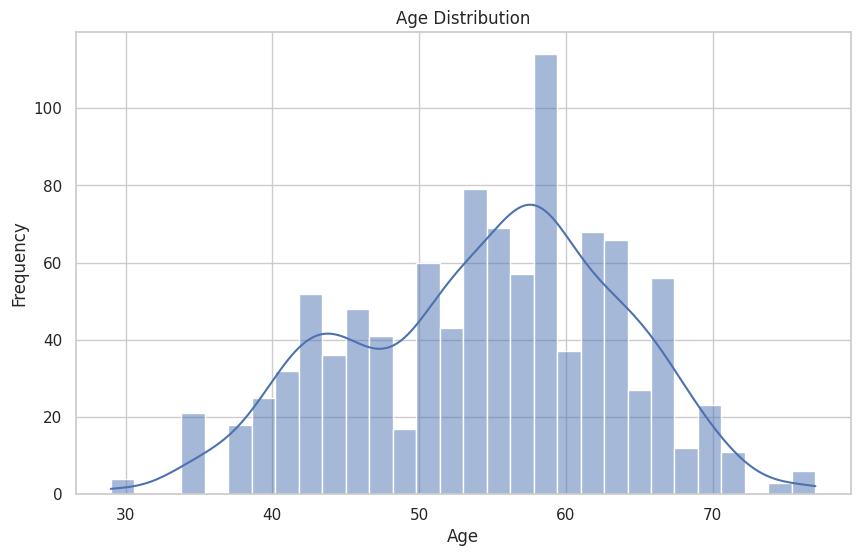

In [26]:
# Histogram of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

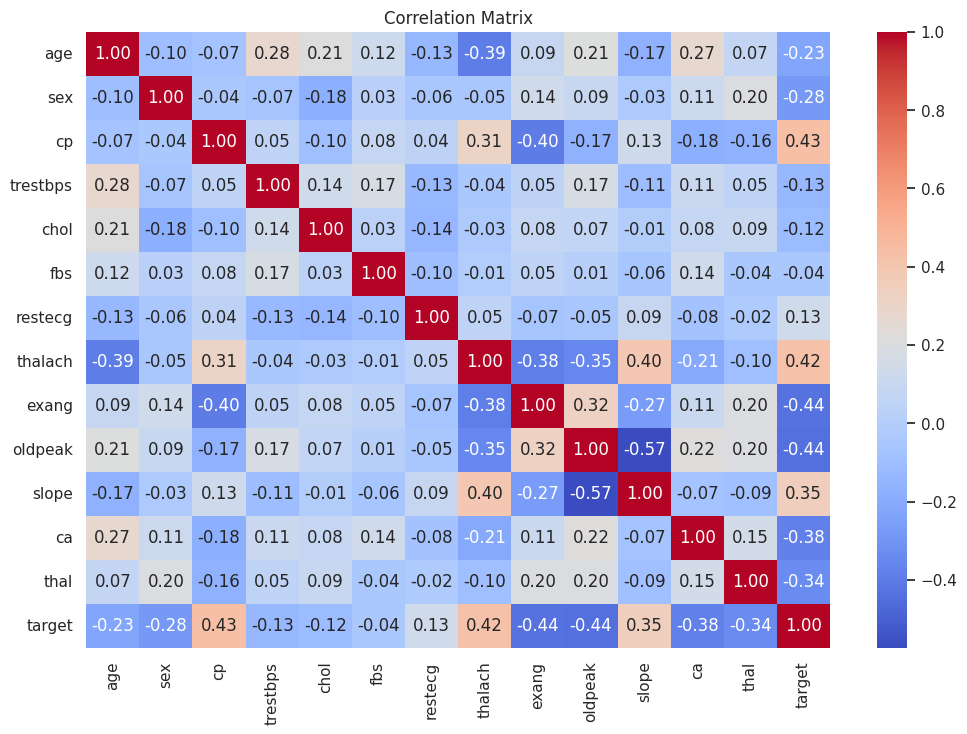

In [27]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **3. Question Formulation and Analysis**

Question 1: What is the average age of patients with heart disease?

In [28]:
average_age_hd = df[df['target'] == 1]['age'].mean()
print(f"The average age of patients with heart disease is {average_age_hd:.2f} years.")

The average age of patients with heart disease is 52.41 years.



 Question 2: What is the maximum cholesterol level in patients with heart disease?

In [29]:

max_chol_heart_disease = df[df['target'] == 1]['chol'].max()
print("Maximum Cholesterol in Patients with Heart Disease:", max_chol_heart_disease)

Maximum Cholesterol in Patients with Heart Disease: 371.0


 Question 3: Is there a significant difference in resting blood pressure between patients with and without heart disease?

In [30]:

avg_bp_heart_disease = df.groupby('target')['trestbps'].mean()
print("Average Resting Blood Pressure:\n", avg_bp_heart_disease)

Average Resting Blood Pressure:
 target
0    133.505010
1    129.131179
Name: trestbps, dtype: float64


 Question 4: What is the distribution of chest pain types among patients with heart disease?

In [31]:

cp_distribution = df[df['target'] == 1]['cp'].value_counts()
print("Chest Pain Type Distribution in Patients with Heart Disease:\n", cp_distribution)

Chest Pain Type Distribution in Patients with Heart Disease:
 cp
2    219
1    134
0    122
3     51
Name: count, dtype: int64


Question 5: What is the relationship between maximum heart rate (thalach) and the occurrence of heart disease?

In [32]:

avg_max_heart_rate = df.groupby('target')['thalach'].mean()
print("Average Maximum Heart Rate:\n", avg_max_heart_rate)

Average Maximum Heart Rate:
 target
0    139.210421
1    158.585551
Name: thalach, dtype: float64


Question 6: What percentage of patients with heart disease experience exercise-induced angina?

In [33]:

exercise_angina_percentage = (df[(df['target'] == 1) & (df['exang'] == 1)].shape[0] / df[df['target'] == 1].shape[0]) * 100
print(f"Percentage of patients with heart disease who experience exercise-induced angina: {exercise_angina_percentage:.2f}%")

Percentage of patients with heart disease who experience exercise-induced angina: 13.50%


Question 7: How many patients with heart disease have a fasting blood sugar > 120 mg/dl?

In [34]:

fbs_high_heart_disease = df[(df['target'] == 1) & (df['fbs'] == 1)].shape[0]
print(f"Number of patients with heart disease and fasting blood sugar > 120 mg/dl: {fbs_high_heart_disease}")

Number of patients with heart disease and fasting blood sugar > 120 mg/dl: 71


# 4. Data Visualization

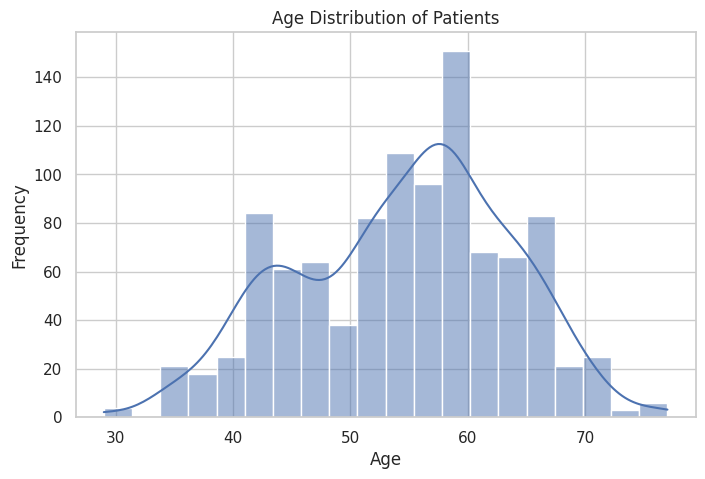

In [36]:

# Visualization 1: Age distribution among patients
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

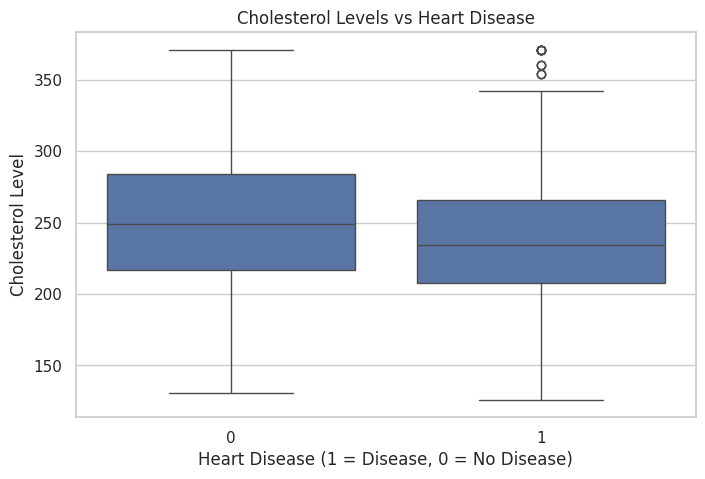

In [40]:
# Visualization 2: Cholesterol levels vs Heart Disease
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels vs Heart Disease')
plt.xlabel('Heart Disease (1 = Disease, 0 = No Disease)')
plt.ylabel('Cholesterol Level')
plt.show()

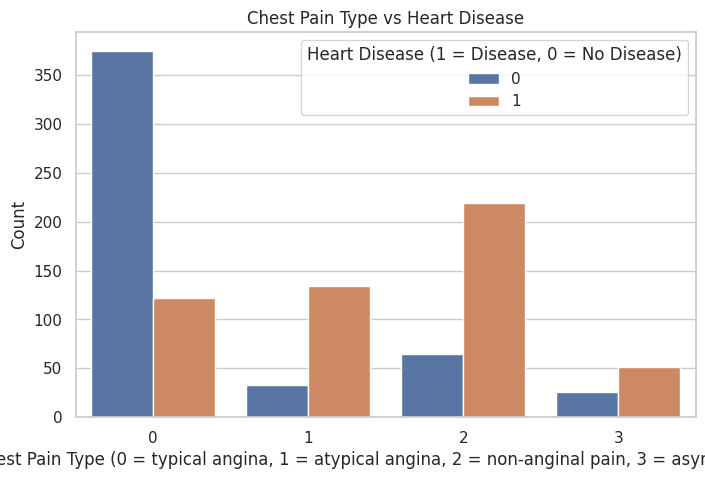

In [41]:
# Visualization 3: Chest Pain Type vs Heart Disease
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)')
plt.ylabel('Count')
plt.legend(title='Heart Disease (1 = Disease, 0 = No Disease)')
plt.show()

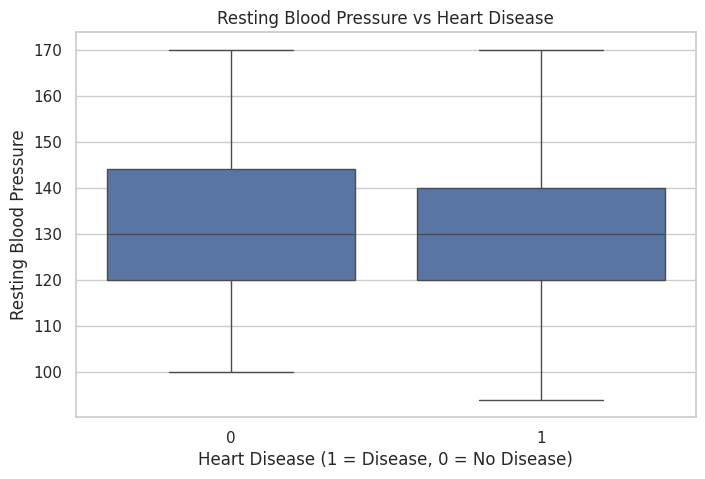

In [42]:
# Visualization 4: Resting Blood Pressure vs Heart Disease
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title('Resting Blood Pressure vs Heart Disease')
plt.xlabel('Heart Disease (1 = Disease, 0 = No Disease)')
plt.ylabel('Resting Blood Pressure')
plt.show()

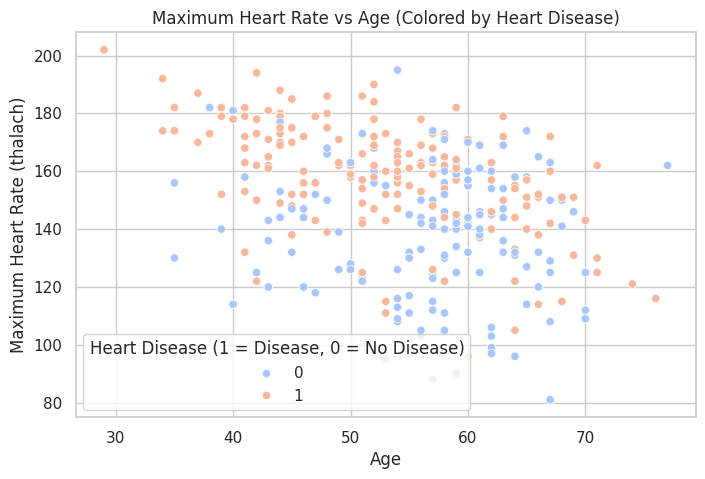

In [43]:
# Visualization 5: Maximum Heart Rate (thalach) vs Age (Colored by Heart Disease)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='thalach', hue='target', palette='coolwarm', data=df)
plt.title('Maximum Heart Rate vs Age (Colored by Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.legend(title='Heart Disease (1 = Disease, 0 = No Disease)')
plt.show()

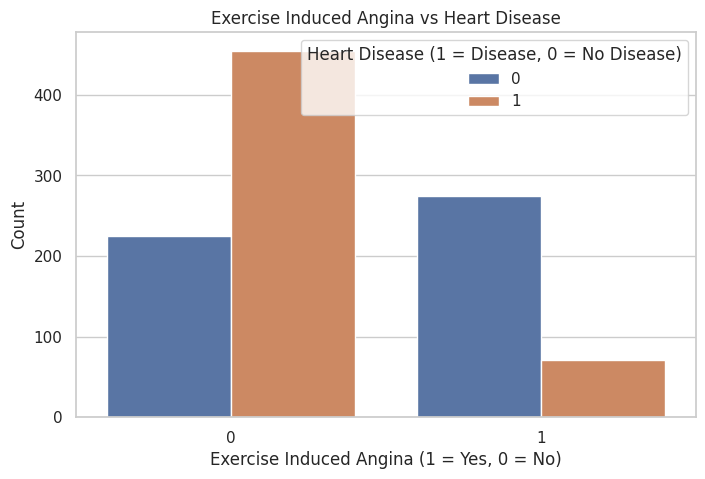

In [44]:
# Visualization 6: Exercise Induced Angina vs Heart Disease
plt.figure(figsize=(8, 5))
sns.countplot(x='exang', hue='target', data=df)
plt.title('Exercise Induced Angina vs Heart Disease')
plt.xlabel('Exercise Induced Angina (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.legend(title='Heart Disease (1 = Disease, 0 = No Disease)')
plt.show()

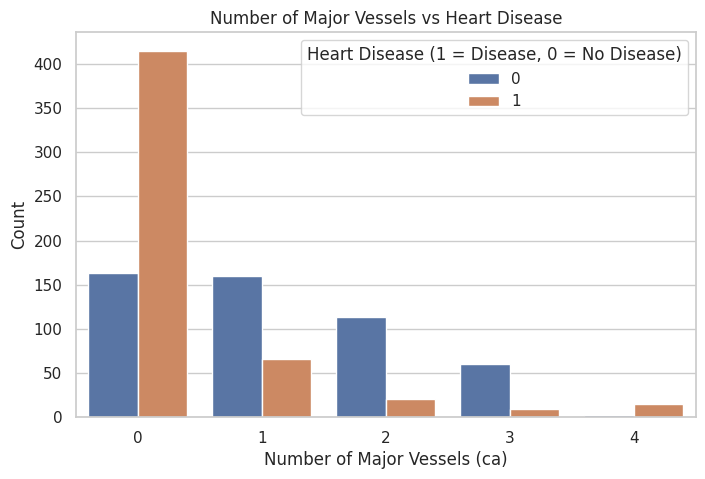

In [45]:
# Visualization 7: Number of Major Vessels vs Heart Disease
plt.figure(figsize=(8, 5))
sns.countplot(x='ca', hue='target', data=df)
plt.title('Number of Major Vessels vs Heart Disease')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Count')
plt.legend(title='Heart Disease (1 = Disease, 0 = No Disease)')
plt.show()

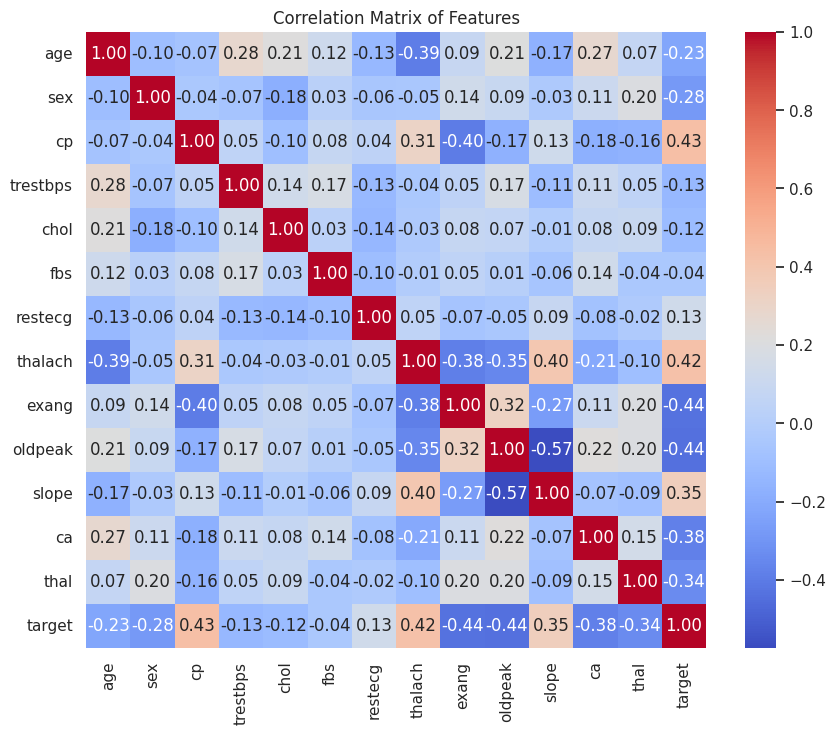

In [46]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()